In [16]:
from sklearn.datasets import make_regression

In [17]:
X, y = make_regression(n_samples=150, n_features=1, random_state=42, noise=50)

In [18]:
X.shape

(150, 1)

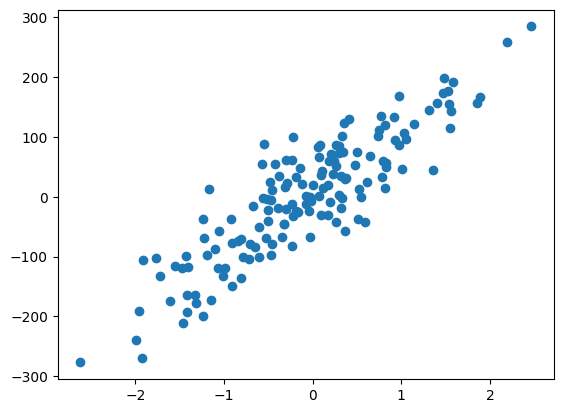

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class LinearReg: 

    def __init__(self, lr = 0.01, epoch = 100):
        self.lr = lr
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def fit(self, X, y, debug=False):
        # M is the size of samples
        # N is the size of features

        m, n = X.shape
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        y = y.reshape(m,1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epoch):
            # Calculate prediction
            y_hat = np.dot(X,self.weights) + self.bias
            # Save current loss
            loss = np.mean((y_hat - y)**2)
            losses.append(loss)
            # Calculate gradient
            dw = (-2/m) * np.dot(X.T,(y - y_hat))
            db = (-2/m) * np.sum(y - y_hat)
            # Update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            # Save params
            w_list.append(self.weights)
            b_list.append(self.bias)
            if debug:
                print(f"epoch: {epoch}, loss: {loss}, weight: {self.weights}, bias: {self.bias}")

        if debug:
            plt.subplot(1,2,1)
            plt.plot(range(self.epoch), losses)
            plt.xlabel("Iterations/Epochs")
            plt.ylabel("Loss/y/f(x)/J/C")
            plt.figure(0)

    def predict(self, X, y, debug=False):
        m, n = X.shape
        y = y.reshape(-1,1)
        print(self.bias)
        print(self.weights)
        y_hat = self.weights * X + self.bias
        loss = np.mean((y_hat - y)**2)
        if debug:
            print(f"loss = {loss}")
            x_plt = np.linspace(-5,5,100)
            y_plt = self.weights[0][0] * x_plt + self.bias[0]
            plt.subplot()
            plt.scatter(X,y)
            plt.scatter(X,y_hat,c = "g")
            plt.plot(x_plt,y_plt, 'r')
            plt.figure(2)
        return y_hat

epoch: 0, loss: 11209.560573964247, weight: [[2.50502599]], bias: [0.46040166]
epoch: 1, loss: 10876.249560639488, weight: [[4.30406478]], bias: [0.43382247]
epoch: 2, loss: 10555.637861685153, weight: [[6.0685478]], bias: [0.41073882]
epoch: 3, loss: 10247.238096562916, weight: [[7.79914369]], bias: [0.39102386]
epoch: 4, loss: 9950.581728109411, weight: [[9.49650809]], bias: [0.37455441]
epoch: 5, loss: 9665.218328613479, weight: [[11.16128383]], bias: [0.3612108]
epoch: 6, loss: 9390.71487468694, weight: [[12.79410125]], bias: [0.35087682]
epoch: 7, loss: 9126.655069791303, weight: [[14.39557837]], bias: [0.34343962]
epoch: 8, loss: 8872.638693327961, weight: [[15.96632118]], bias: [0.33878964]
epoch: 9, loss: 8628.280975243051, weight: [[17.50692387]], bias: [0.3368205]
epoch: 10, loss: 8393.211995139614, weight: [[19.01796905]], bias: [0.33742892]
epoch: 11, loss: 8167.07610492996, weight: [[20.50002799]], bias: [0.34051466]
epoch: 12, loss: 7949.531374099385, weight: [[21.9536608

<Figure size 640x480 with 0 Axes>

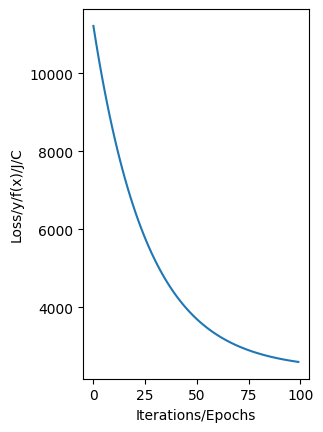

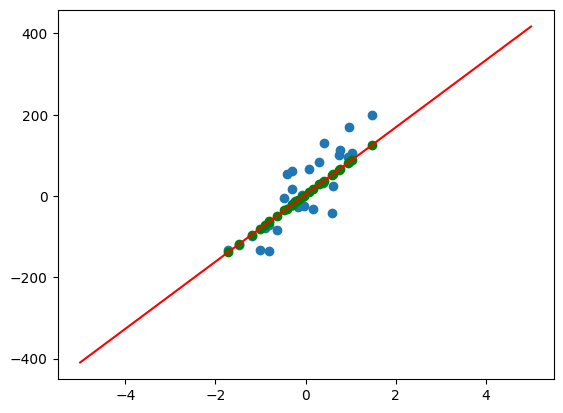

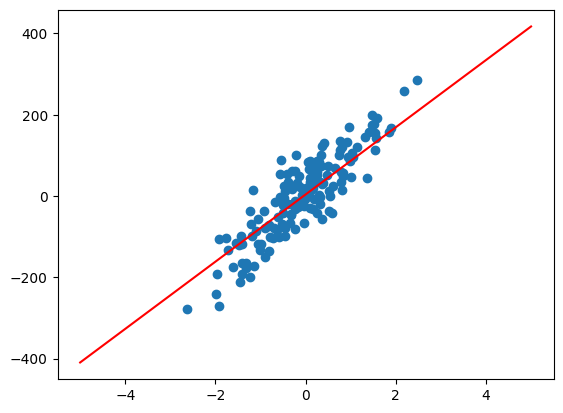

<Figure size 640x480 with 0 Axes>

In [23]:
model = LinearReg(.01,100)
model.fit(X_train, y_train,True)
model.predict(X_test, y_test, True)
print(model.weights)

x_plt = np.linspace(-5,5,100)
y_plt = model.weights[0][0] * x_plt + model.bias[0]
plt.scatter(X,y)
plt.plot(x_plt,y_plt, 'r')
plt.figure(3)
#2399.462998674972